<h1 align="center"><b>Adaboost</b></h1>

<h3>Importing modules and data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./datasets/train.csv")

<h3>Data preprocessing and plots</h3>

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df["price_range"].unique()

array([1, 2, 3, 0])

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


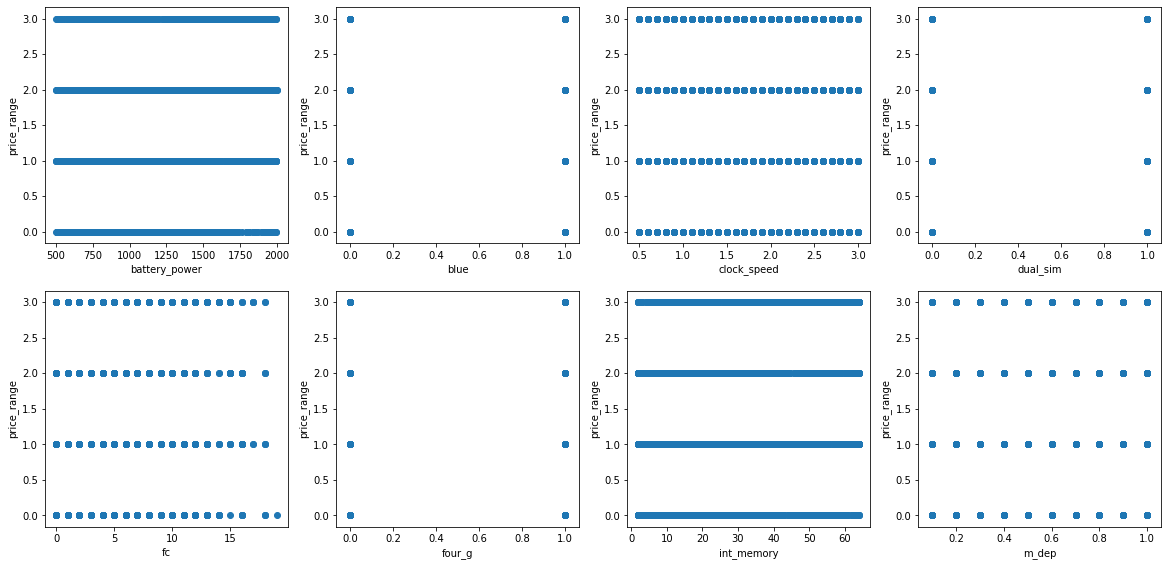

In [8]:
plt.figure(figsize=(20,20))

for i in range(8):
    plt.subplot(4,4,i+1)
    plt.scatter(df[df.columns[i]],df["price_range"])
    plt.xlabel('%s'%df.columns[i])
    plt.ylabel('price_range')
plt.show()

<h4>Splitting data</h4>

In [9]:
x = df.drop(columns="price_range")

In [10]:
y = df["price_range"]

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85)

<h3>Basic AdaBoost Classifier with Decision tree of depth=1 as base_estimator</h3>

In [12]:
adbc = AdaBoostClassifier()

adbc.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

<h4>Accuracy</h4>

In [13]:
p = adbc.predict(xtrain)

train_acc = accuracy_score(ytrain,p)

p = adbc.predict(xtest)

test_acc = accuracy_score(ytest,p)

print("Train accuracy = {} , test accuracy = {} ".format(train_acc,test_acc))

Train accuracy = 0.7235294117647059 , test accuracy = 0.7433333333333333 


<h3>AdaBoost Classifier with Decision Tree of depth=3 as base_estimator</h3>

In [14]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)

adbc = AdaBoostClassifier(base_estimator=dt)

In [15]:
adbc.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

<h4>Accuracy</h4>

In [16]:
p = adbc.predict(xtrain)

train_acc = accuracy_score(ytrain,p)

p = adbc.predict(xtest)

test_acc = accuracy_score(ytest,p)

print("Train accuracy = {} , test accuracy = {} ".format(train_acc,test_acc))

Train accuracy = 0.8558823529411764 , test accuracy = 0.8333333333333334 


<h3>AdaBoost Classifier with Decision tree of depth=5 as base_estimator</h3>

In [29]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=5)

adbc = AdaBoostClassifier(base_estimator=dt)

In [30]:
adbc.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

<h4>Accuracy</h4>

In [31]:
p = adbc.predict(xtrain)

train_acc = accuracy_score(ytrain,p)

p = adbc.predict(xtest)

test_acc = accuracy_score(ytest,p)

print("Train accuracy = {} , test accuracy = {} ".format(train_acc,test_acc))

Train accuracy = 0.9894117647058823 , test accuracy = 0.92 
